In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
univariate_data=test_new.loc[500:24999,['dateTime','AEDAHO_T9_V2']]
univariate_data = univariate_data.set_index('dateTime')
univariate_data=univariate_data.loc[::-1]

shape of univariate_data:  (24500, 1)


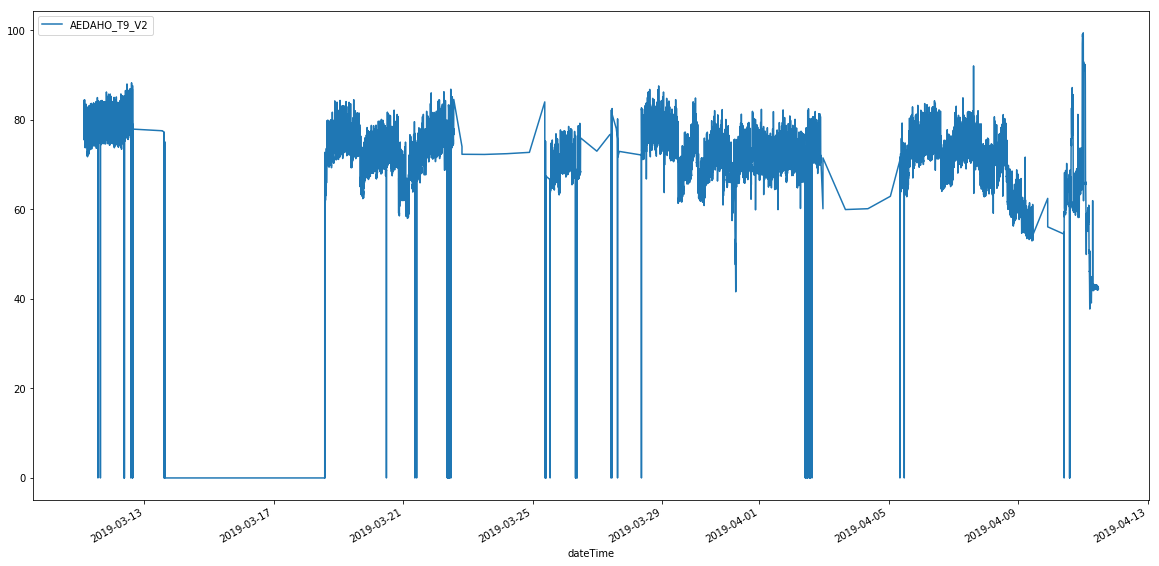

In [8]:
print('shape of univariate_data: ',univariate_data.shape)
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [9]:
from numpy import nan
univariate_data_drop_zero= univariate_data.replace(0,nan)
univariate_data_drop_zero= univariate_data_drop_zero.dropna(how='any',axis=0)

shape of univariate_data:  (24500, 1)
shape of univariate_data_drop_zero:  (24410, 1)


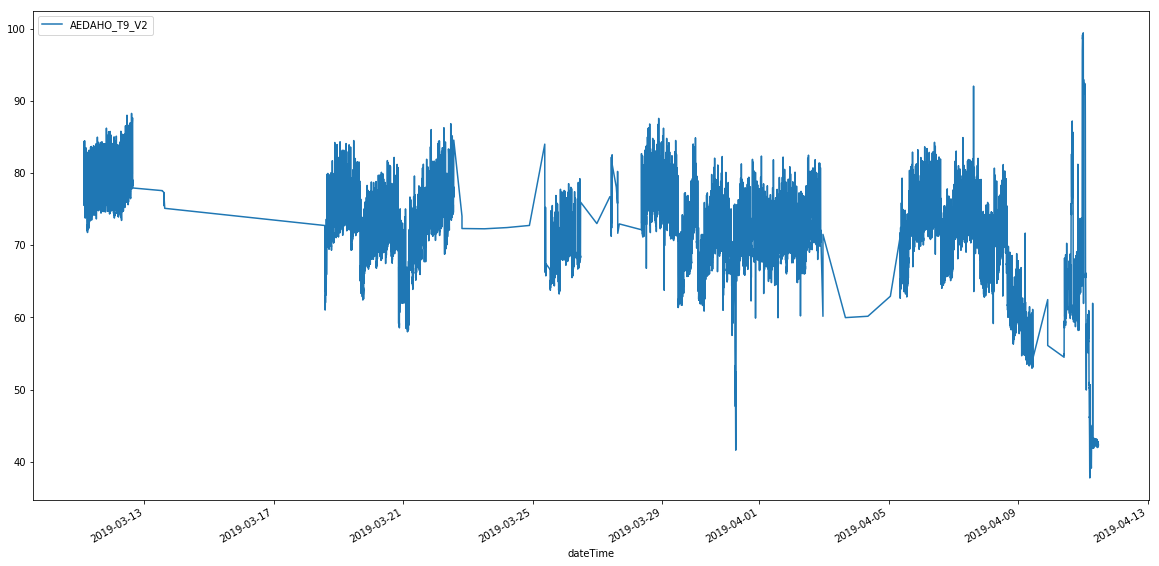

In [10]:
print('shape of univariate_data: ',univariate_data.shape)
print('shape of univariate_data_drop_zero: ',univariate_data_drop_zero.shape)

univariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [12]:
print(univariate_data_drop_zero.head())
dataset=np.array(univariate_data_drop_zero)

                     AEDAHO_T9_V2
dateTime                         
2019-03-11 03:14:00     83.327361
2019-03-11 03:15:00     84.314814
2019-03-11 03:16:00     84.380943
2019-03-11 03:17:00     83.279853
2019-03-11 03:18:00     79.963124


In [15]:
NumberOfElements=int(len(dataset)*0.96)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_data_stack=dataset[0:NumberOfElements]
print(train_data_stack.shape)
test_data_stack=dataset[NumberOfElements:len(dataset)]
print(test_data_stack.shape)

Number of Elements for training:  23433
dataset length:  24410
(23433, 1)
(977, 1)


In [16]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_steps_stack=3

# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

X_train_stack,y_train_stack=split_sequence(train_data_stack,n_steps_stack)

In [17]:
n_features_stack = 1
X_train_stack = X_train_stack.reshape((X_train_stack.shape[0], X_train_stack.shape[1], n_features_stack))

In [19]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=100

def stack_lstm():
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_stack, n_features_stack)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    
    return model
stack_lstm=stack_lstm()

stack_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
stack_lstm.fit(X_train_stack, y_train_stack,batch_size=batch_size, epochs=epochs,validation_split=0.2,callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/stack_100.h5', 
                                     save_best_only=True)])

Train on 18744 samples, validate on 4686 samples
Epoch 1/100
18744/18744 [==============================] - 5s 288us/step - loss: 35.6429 - acc: 0.0000e+00 - val_loss: 4.5756 - val_acc: 0.0000e+00
Epoch 2/100
18744/18744 [==============================] - 3s 159us/step - loss: 5.2291 - acc: 0.0000e+00 - val_loss: 6.4800 - val_acc: 0.0000e+00
Epoch 3/100
18744/18744 [==============================] - 3s 157us/step - loss: 4.7360 - acc: 0.0000e+00 - val_loss: 2.9683 - val_acc: 0.0000e+00
Epoch 4/100
18744/18744 [==============================] - 3s 166us/step - loss: 3.5725 - acc: 0.0000e+00 - val_loss: 2.6969 - val_acc: 0.0000e+00
Epoch 5/100
18744/18744 [==============================] - 3s 170us/step - loss: 2.8121 - acc: 0.0000e+00 - val_loss: 1.4343 - val_acc: 0.0000e+00
Epoch 6/100
18744/18744 [==============================] - 3s 167us/step - loss: 1.9769 - acc: 0.0000e+00 - val_loss: 7.8092 - val_acc: 0.0000e+00
Epoch 7/100
18744/18744 [==============================] - 3s 164us/

18744/18744 [==============================] - 3s 158us/step - loss: 1.2720 - acc: 0.0000e+00 - val_loss: 1.1134 - val_acc: 0.0000e+00
Epoch 57/100
18744/18744 [==============================] - 3s 157us/step - loss: 1.2720 - acc: 0.0000e+00 - val_loss: 1.1133 - val_acc: 0.0000e+00
Epoch 58/100
18744/18744 [==============================] - 3s 157us/step - loss: 1.2720 - acc: 0.0000e+00 - val_loss: 1.1134 - val_acc: 0.0000e+00
Epoch 59/100
18744/18744 [==============================] - 3s 157us/step - loss: 1.2720 - acc: 0.0000e+00 - val_loss: 1.1131 - val_acc: 0.0000e+00
Epoch 60/100
18744/18744 [==============================] - 3s 157us/step - loss: 1.2720 - acc: 0.0000e+00 - val_loss: 1.1132 - val_acc: 0.0000e+00
Epoch 61/100
18744/18744 [==============================] - 3s 159us/step - loss: 1.2720 - acc: 0.0000e+00 - val_loss: 1.1132 - val_acc: 0.0000e+00
Epoch 62/100
18744/18744 [==============================] - 3s 160us/step - loss: 1.2720 - acc: 0.0000e+00 - val_loss: 1.1132

In [20]:
test_ip_stack,test_op_stack=split_sequence(test_data_stack,n_steps_stack)
X_test_ip_stack=test_ip_stack.reshape((test_ip_stack.shape[0], test_ip_stack.shape[1], n_features_stack))

In [21]:
from keras.models import load_model

load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/stack_100.h5')

In [24]:
y_pred_stack=load_trained_model.predict(X_test_ip_stack)

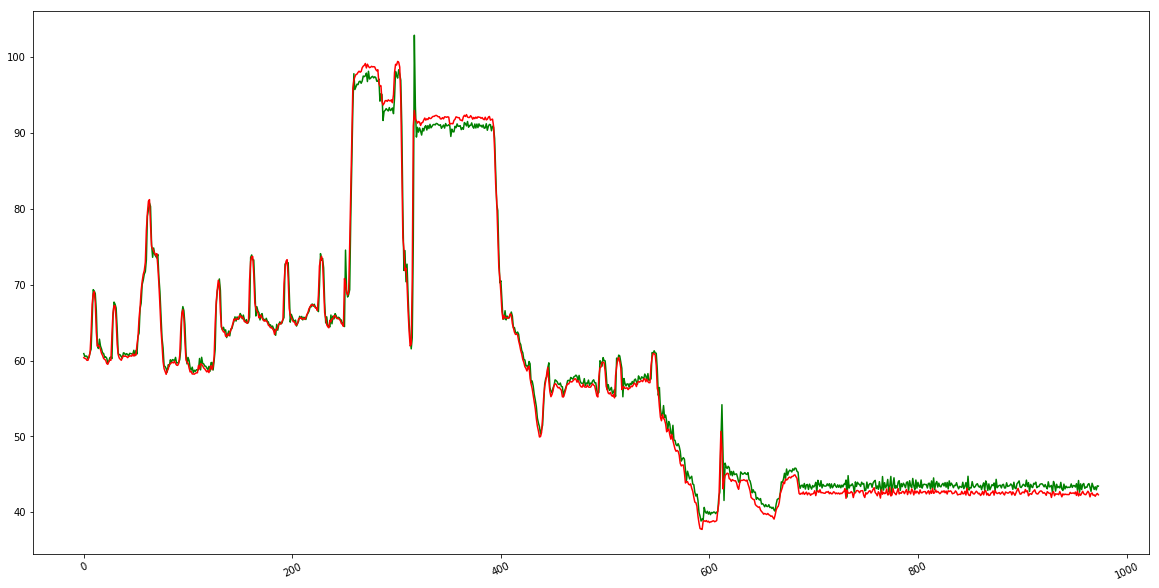

In [25]:
plt.plot(y_pred_stack,color='green')
plt.plot(test_op_stack,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()